In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
X_train_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)  # input
y_train_data = np.array([[0], [1], [1], [0]], dtype=np.float32)  # output

In [3]:
# define number of neurons in each layer
n_input = 2  # number of features
n_hidden = 4  # number of hidden units
n_output = 1  # number of output units

# define placeholders for input and output
X = tf.placeholder(tf.float32, shape=[None, n_input])
y = tf.placeholder(tf.float32, shape=[None, n_output])

# define weights and biases for each layer
W1 = tf.Variable(tf.random_normal([n_input, n_hidden]))  # weights from input to hidden layer
b1 = tf.Variable(tf.random_normal([n_hidden]))  # biases for hidden layer
W2 = tf.Variable(tf.random_normal([n_hidden, n_output]))  # weights from hidden to output layer
b2 = tf.Variable(tf.random_normal([n_output]))  # biases for output layer

# define activation functions for each layer
z1 = tf.add(tf.matmul(X, W1), b1)  # linear combination for hidden layer
a1 = tf.nn.sigmoid(z1)  # sigmoid activation for hidden layer
z2 = tf.add(tf.matmul(a1, W2), b2)  # linear combination for output layer
a2 = tf.nn.sigmoid(z2)  # sigmoid activation for output layer# define cost function and optimizer
cost = tf.reduce_mean(tf.square(y - a2))  # mean squared error
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)  # gradient descent optimizer

Epoch 0, Cost: 0.4847522974014282
Epoch 100, Cost: 0.4739477038383484
Epoch 200, Cost: 0.43180084228515625
Epoch 300, Cost: 0.26930809020996094
Epoch 400, Cost: 0.2568180561065674
Epoch 500, Cost: 0.2548760175704956
Epoch 600, Cost: 0.2531295418739319
Epoch 700, Cost: 0.25152918696403503
Epoch 800, Cost: 0.25003522634506226
Epoch 900, Cost: 0.24860265851020813
Predictions: [[0.46939814]
 [0.48545924]
 [0.5260602 ]
 [0.52823824]]
Actual: [[0.]
 [1.]
 [1.]
 [0.]]


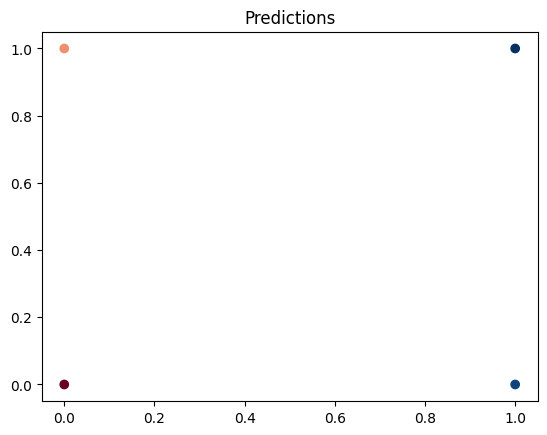

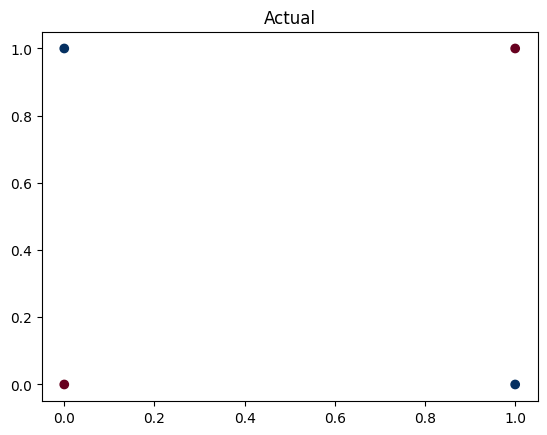

In [4]:
# create a session object
sess = tf.Session()

# initialize all variables
sess.run(tf.global_variables_initializer())

# train for 1000 epochs
for epoch in range(1000):
    # run optimization and calculate cost
    _, c = sess.run([optimizer, cost], feed_dict={X: X_train_data, y: y_train_data})
    # print cost every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {c}")

# our model on unseen data
X_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)  # test input
y_test = np.array([[0], [1], [1], [0]], dtype=np.float32)  # test output

# predict using our trained model
y_pred = sess.run(a2, feed_dict={X: X_test})

# print predictions and actual values
print(f"Predictions: {y_pred}")
print(f"Actual: {y_test}")

# plot predictions and actual values
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred[:, 0], cmap='RdBu')
plt.title("Predictions")
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test[:, 0], cmap='RdBu')
plt.title("Actual")
plt.show()

# close session
sess.close()